In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Intro to Hierarchical Clustering
Week 7 | Lesson 2.3

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Perform a Hierarchical Clustering
- Plot, Analyze, and Understand the Dendrogram
- Understand Linkages

### LESSON GUIDE
| TYPE  | TOPIC  |
|---|---|
| Introduction  | What is Hierarchical Clustering?  |
| Demo | Example of Hierarchical Clustering  |
| Guided Practice | Hierarchical Clustering in Python |
| Independent Practice | Implement hierarchical clustering

## Clustering Review

### What we're doing

> In clustering, we seek to use the similarities between features to infer groupings

### How we know we're doing it well

> We see high intra-cluster similarity and low inter-cluster similarity
* Silhouette score

### What we've seen so far:

### K-Means

### How K-Means works:

- Pick k
- Select k random points in the feature space
- Calculate the nearest centroid to each point
- Move centroid to the center of the associated points
- Repeat last two steps until centroids stabilize

### Visually:

<img src="http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif">

## Question: Is k-means deterministic?

## K-Means

### Pros:

- Easy to implement even on relatively large data sets ( ~$O(n)$ )
- Usually "good enough" results

### Cons:

- Requires an arbitrary k
- Sensitive to outliers (k-medians is more robust)
- With random initial centroids lacks repeatability (but can be seeded)
- Works best if data conforms to circular -> spherical -> hyperspherical shape (n.b. using means)
- Works best with similar density clusters

## K-Means is an example of "Flat Clustering"

## Today we look at Hierarchical Clustering

<img src="http://i.imgur.com/A0IRhu9.png" width=400>

## What is Hierarchical Clustering?

It is an iterative approach to clustering that works by computing pairwise distances between clusters
* Each data point connects to every other point (a full taxonomy)

## How It's Done:

Two Approaches: Agglomorative and Divisive

## Agglomorative (bottom-up)

Agglomorative works by starting with each point in a separate group. At each step the two points/clusters with the least distance between them are linked. This continues until there is only one cluster.

## Divisive (top-down)

Divisive clustering works the opposite way. All points are in a single cluster to begin with. At each iteratiion, the points with the greatest distance are serparated.

## Agglomorative is far more common in practice (simpler to implement), so we'll be focusing on that.

## Visualization of the agglomorative process

<img src="http://i.makeagif.com/media/2-24-2014/DkJOLy.gif" width=500>

## Step by step

<img src="http://i.imgur.com/t2n4j6k.png" width=500>

## We'll start the process...

At each step we greedily merge to two nearest points

<img src="http://i.imgur.com/B2nKI1i.png" width=500>

## We can visualize it with a dendrogram

<img src="http://i.imgur.com/MQAn5UQ.png" width=700>

## Clusters side-by-side with dendrogram

<img src="http://i.imgur.com/9rDaKJK.png" width=700>

## Dendrogram Properties:

- Each leaf corresponds to a single point
- Each internal node represents a cluster (top of the fork)
- Each node has two child nodes
- The root node encompases all points
- The height of each node is proportional to the distance between each cluster

## So how do we calculate the distance between the clusters?

## Three Basic Options (but there are more):

We use a distance metric (typically euclidean) calculated in one of the following ways:

- Single Linkage

- Complete Linkage

- Average

## Single Linkage

Is the shortest distance between all points in the cluster

<img src="http://i.imgur.com/Hj6cTqi.png" width=500>

## Complete Linkage

Is the furthest distance between all points in the cluster

<img src="http://i.imgur.com/HHCEvNb.png" width=500>

## Average Linkage

Is the average distance between all points

<img src="http://i.imgur.com/E7tfvY2.png" width=500>

## Check: does scaling matter?

## Which is best?

You didn't reeaaally think there is a simple answer do you?

## Which is best?

- Single can cause "chaining" where clusters are too spread out

- Complete can cause crowding where points are closer to another cluster than their own

- Average tries to strike a balance, but tends to be less intrepretable

<img src="http://i.imgur.com/0yGI6IK.png" width=600>

## But if everything is ultimately linked, how do we choose the optimal number of clusters?

## <center>Eyeball it.</center>
<br><br>
### (Pro-tip: Don't use Google image search for the word "eyeball")

## Where we cut the trees determines this

<img src="http://i.imgur.com/ecH4BTK.png" width=700>

## Exercise
1. As a table, draw an x,y plane with 8 randomly placed data points.
2. Using hierarchical clustering (single linkage) cluster together the points step by step. You should also build a dendrogram to trace your steps.

## Implementing hierarchical clustering in python

## 1. Get our data...

In [2]:
X = pd.read_csv('https://www.dropbox.com/s/1v1rai5007ps5yu/cities.csv?dl=1', index_col=0)

In [3]:
X

,BOS,NY,DC,MIA,CHI,SEA,SF,LA,DEN
BOS,0,206,429,1504,963,2976,3095,2979,1949
NY,206,0,233,1308,802,2815,2934,2786,1771
DC,429,233,0,1075,671,2684,2799,2631,1616
MIA,1504,1308,1075,0,1329,3273,3053,2687,2037
CHI,963,802,671,1329,0,2013,2142,2054,996
SEA,2976,2815,2684,3273,2013,0,808,1131,1307
SF,3095,2934,2799,3053,2142,808,0,379,1235
LA,2979,2786,2631,2687,2054,1131,379,0,1059
DEN,1949,1771,1616,2037,996,1307,1235,1059,0


## 2. Set our imports

In [4]:
from scipy.cluster import hierarchy
from scipy.spatial import distance as ssd

## 3. Pass our into SciPy's hierarchy.linkagage()

In [7]:
# due to open github issue with distance matrix using squareform
# see http://stackoverflow.com/questions/36520043/triangle-vs-square-distance-matrix-for-hierarchical-clustering-python
Z = hierarchy.linkage(ssd.squareform(X), method="complete")

## 4. Then plot using hierarchy.dendrogram()

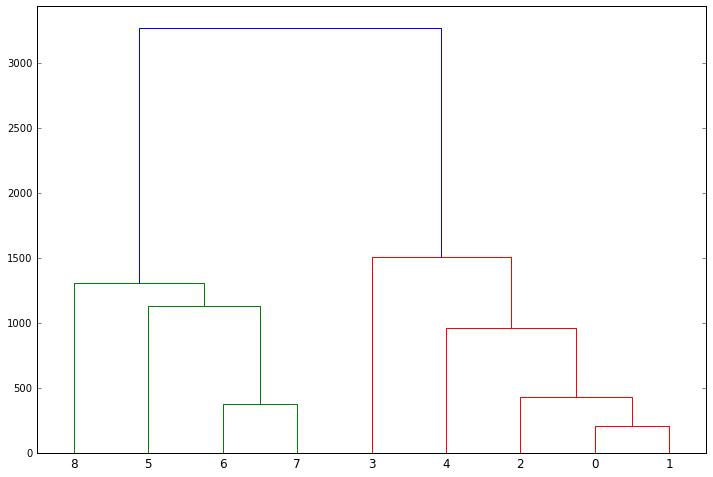

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z)

## We can change the orientation and add labels

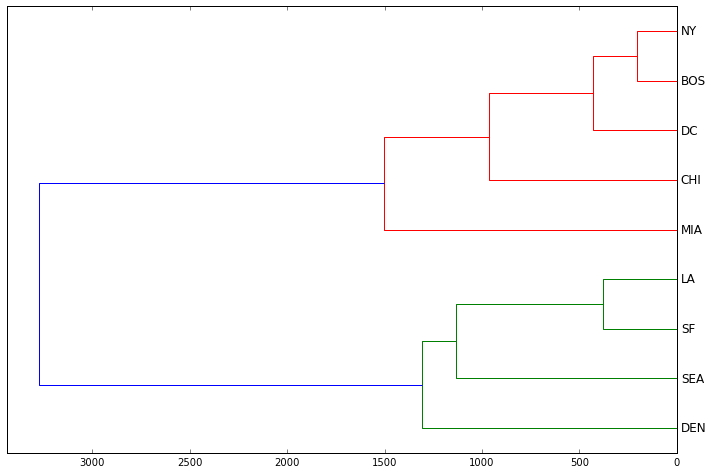

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z, orientation='left', labels=X.index)

## Change the cut point using .fcluster()

### Cut at 1000 miles

In [11]:
max_dist = 1000
clusters1k = hierarchy.fcluster(Z, max_dist, criterion='distance')
clusters1k

array([4, 4, 4, 5, 4, 2, 1, 1, 3], dtype=int32)

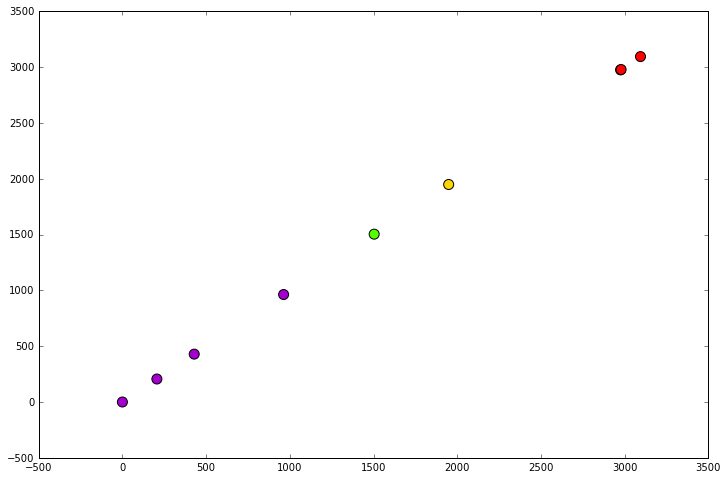

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X.iloc[:,0], X.iloc[:,0], c=clusters1k, cmap='prism', s=100);

### Cut at 2000 miles

In [13]:
max_dist = 2000
clusters2k = hierarchy.fcluster(Z, max_dist, criterion='distance')
clusters2k

array([2, 2, 2, 2, 2, 1, 1, 1, 1], dtype=int32)

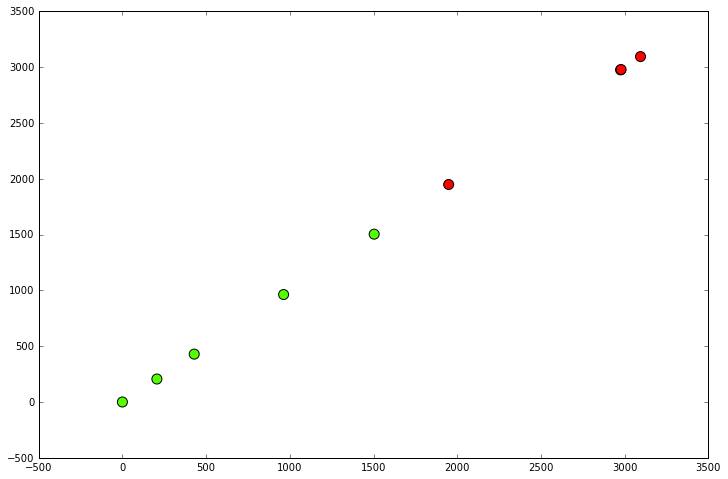

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X.iloc[:,0], X.iloc[:,0], c=clusters2k, cmap='prism', s=100);

## Exercise:

How will using single linkage rather than complete affect this?<br>
- Using the data from above, run a model with a cut point of 2000, but use 'single' as the linkage method
- Plot the dendrogram
- How many clusters do you have at that level? How and why is it different from the one above with complete linkage?

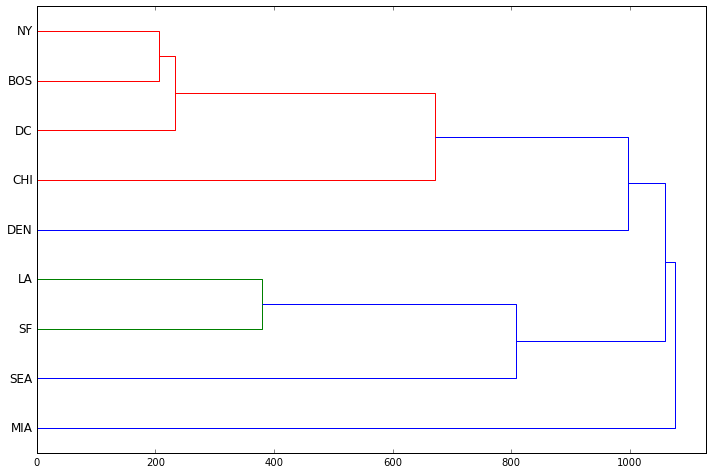

In [25]:
Z1 = hierarchy.linkage(ssd.squareform(X), method="single")
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z1, orientation='right', labels=X.index)

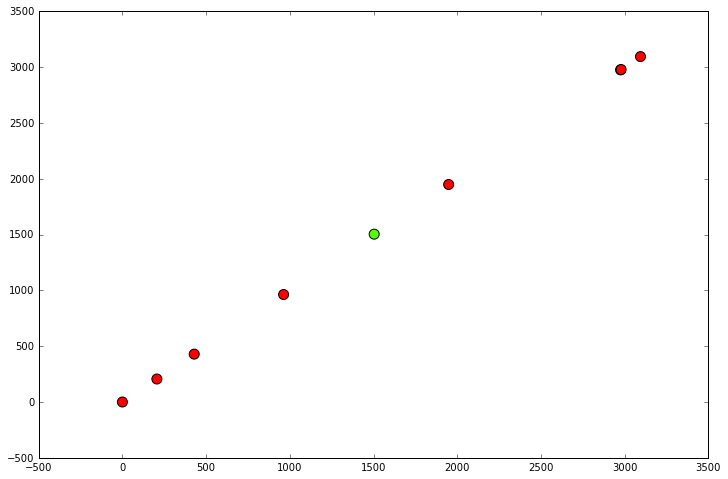

In [24]:
max_dist = 1070
clusters1k = hierarchy.fcluster(Z1, max_dist, criterion='distance')
clusters1k

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X.iloc[:,0], X.iloc[:,0], c=clusters1k, cmap='prism', s=100);

## Independent Practice

Utilize the starter code to practice hierarchical clustering on the iris dataset

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [50]:
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame(iris['data'])
X = StandardScaler().fit(X)
y = iris['target']

In [51]:
type(X)

sklearn.preprocessing.data.StandardScaler

In [52]:
Z3 = hierarchy.linkage(ssd.pdist(X), method="single")
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z3, orientation='right', labels=X.index)

ValueError: A 2-dimensional array must be passed.

AttributeError: 'StandardScaler' object has no attribute 'iloc'

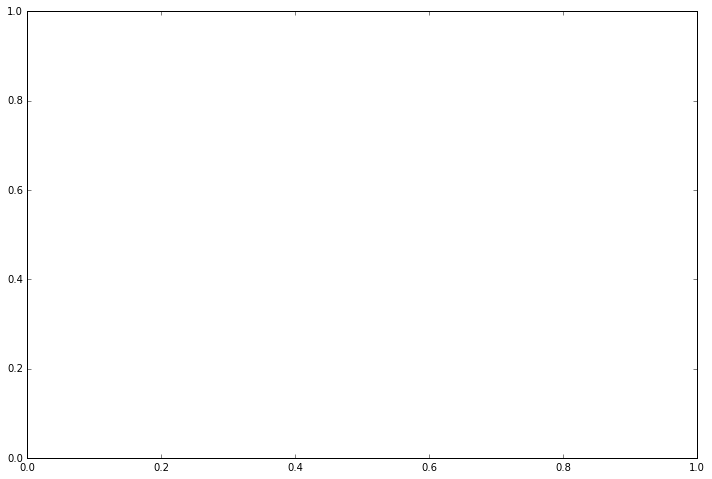

In [53]:
max_dist = 1070
clusters1k = hierarchy.fcluster(Z1, max_dist, criterion='distance')
clusters1k

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X.iloc[:,0], X.iloc[:,0], c=clusters1k, cmap='prism', s=100);

## Conclusion: Hierarchical Clustering

Pros:

- No need to pick explicit k (...but kinda bc of split point)
- Repeatability/Deterministic model (always get the same clusters) 
- Can dial cluster levels at will
    
Cons:
    
- Runs in $~O(n^2)$ time - so must be relatively small dataset
- Requires selecting a linkage method

## Additional Resources

- [Hierarchical Clustering Video](https://www.youtube.com/watch?v=OcoE7JlbXvY)